1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
from matplotlib import pyplot as plt

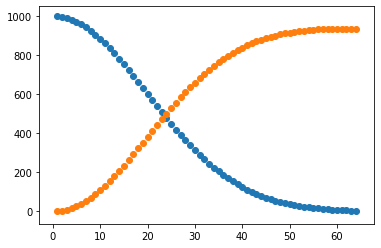

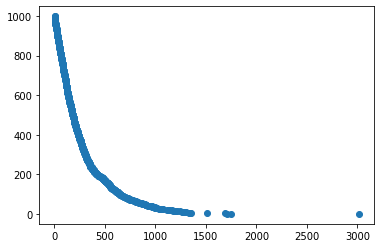

In [2]:
Tl = 1000
Pb = 0
tau = 3.052*60/np.log(2)

thallium = []
lead = []
time = []

def p(t, T):
    return 1-2**(-t/T)

t=0
while Tl > 1:
    Pb = int(Pb+p(t, tau)*Tl)
    Tl = int((1-p(t, tau))*Tl)
    t+=1
    thallium.append(Tl)
    lead.append(Pb)
    time.append(t)
plt.scatter(time, thallium)
plt.scatter(time, lead)
plt.show()

def ip(x, T):
    return -np.log(1-x)*T

time = ip(np.random.rand(1000), tau)
time.sort()
thallium = np.arange(0, 1000)[::-1]

plt.scatter(time, thallium)
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
a0 = 0.53e-10
E = 7.7e6
e = 1.6e-19
epsilon = 8.85e-12
Z = 79

x = np.random.randn(1000000, 2)*a0/100
bounce=0
for i in range(1000000):
    tan = Z*e/2/np.pi/epsilon/E/(np.sqrt(x[i,0]**2+x[i,1]**2))
    if tan>1:
        bounce+=1
print("fraction of bouncing back particles: ",bounce/1000000)

fraction of bouncing back particles:  0.001553


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [5]:
def f(x):
    return np.sin(1/x/(2-x))**2

N = 100000
hit = 0
for i in range(N):
    x = np.random.random()*2
    y = np.random.random()
    if y<f(x):
        hit+=1
hit = 2*hit/N
print("hit/miss integral: ",hit)

hit_err = 2/np.sqrt(2/N)*2/N
print("hit/miss error: ", hit_err)
#calculating the mean value of the square area containing each point and counting how many of them are approximately
#needed to cover the delimiting curve

x = np.random.uniform(0,2,10000)
mean = f(x).mean()
mean_val = mean*2
print("mean value integral: ", mean_val)
mean_error = 2*np.sqrt(f(x).var()/N)
print("mean value error: ", mean_error)

hit/miss integral:  1.45202
hit/miss error:  0.008944271909999158
mean value integral:  1.444298037697975
mean value error:  0.0016855515657976682


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
def f(x,y):
    return x**2+y**2

N = 1000000
hit = 0
for i in range(N):
    x = np.random.random()*2-1
    y = np.random.random()*2-1
    if f(x,y)<1:
        hit+=1
hit = 4*hit/N
print("integral 2d sphere: ", hit)

d = 10

def f(x):
    s = 0
    for i in range(d):
        s+=x[i]**2
    return s

x = [0 for i in range(d)]
hit = 0
for i in range(N):
    for j in range(d):
        x[j] = np.random.random()*2-1
    if f(x)<1:
        hit+=1
hit = 2**d*hit/N
print("integral 10d sphere: ", hit)

integral 2d sphere:  3.140704
integral 10d sphere:  2.550784


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [7]:
N = 1000000
x = np.random.rand(N)**2 #using 1/sqrt(x) as distribution, normalized to 1 by multiplying for 1/2

def f(x):
    return x**(-0.5)/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

rap = f(x)/w(x)
I = rap.mean()*2 #integral of w(x) in 0-1 is 2
print("integral: ", I)

integral:  0.8391465786888888
